
SVR (Raw 4x4):
  MSE: 1564.07
  R²:  0.9205


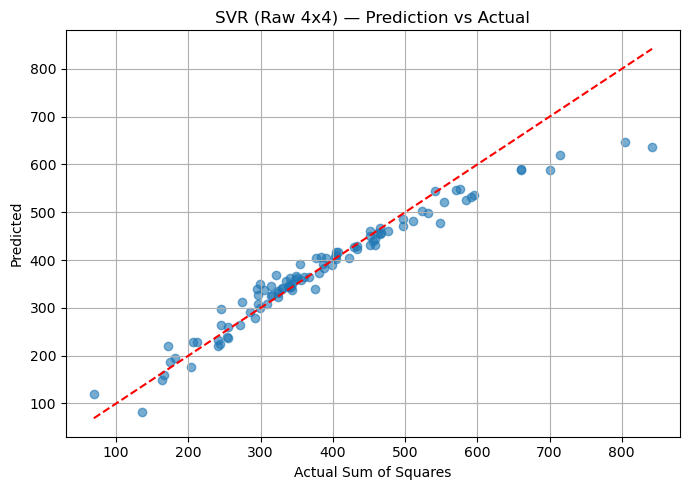

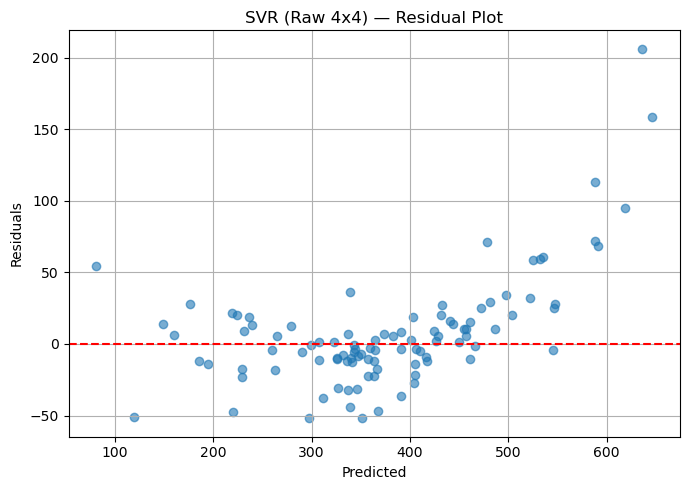

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv('train_4x4_eigen_data.csv')
test_df = pd.read_csv('test_4x4_eigen_data.csv')

feature_cols = list("abcdefghijklmnop")
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"\nSVR (Raw 4x4):")
print(f"  MSE: {mse:.2f}")
print(f"  R²:  {r2:.4f}")

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("SVR (Raw 4x4) — Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("SVR (Raw 4x4) — Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()



SVR (Featured 4x4):
  MSE: 1513.20
  R²:  0.9231


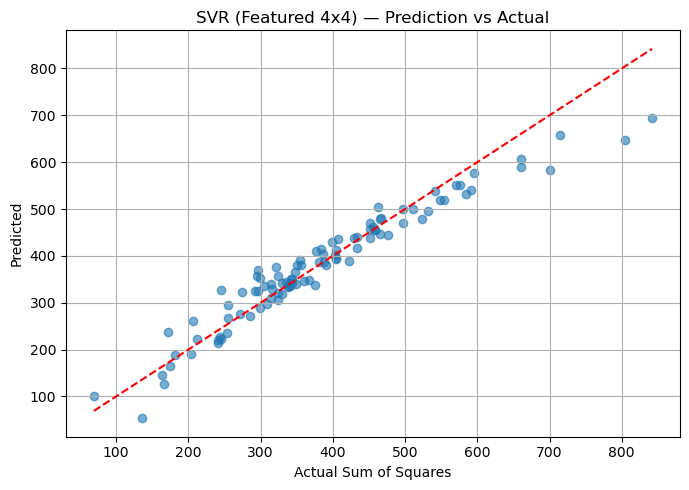

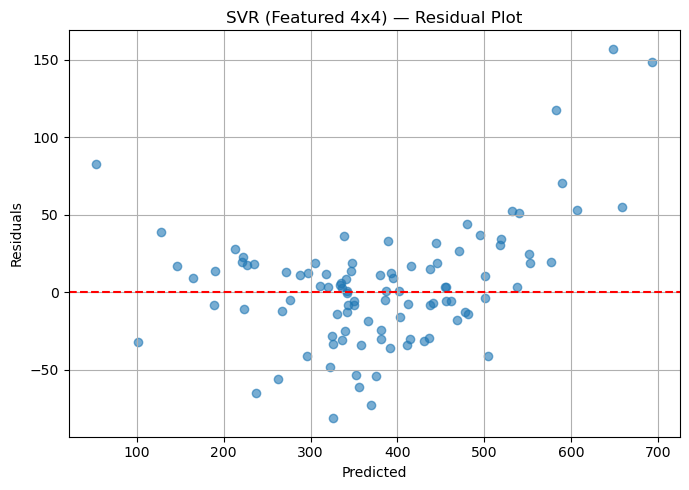

In [6]:
def add_features(df):
    df['trace'] = df['a'] + df['f'] + df['k'] + df['p']

    def symmetry_score(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d']],
            [row['e'], row['f'], row['g'], row['h']],
            [row['i'], row['j'], row['k'], row['l']],
            [row['m'], row['n'], row['o'], row['p']]
        ])
        score = 0
        for i in range(4):
            for j in range(i + 1, 4):
                score += abs(mat[i][j] - mat[j][i])
        return score

    def det_4x4(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d']],
            [row['e'], row['f'], row['g'], row['h']],
            [row['i'], row['j'], row['k'], row['l']],
            [row['m'], row['n'], row['o'], row['p']]
        ])
        return np.linalg.det(mat)

    df['sym_score'] = df.apply(symmetry_score, axis=1)
    df['det'] = df.apply(det_4x4, axis=1)
    return df

train_df = add_features(pd.read_csv('train_4x4_eigen_data.csv'))
test_df = add_features(pd.read_csv('test_4x4_eigen_data.csv'))

feature_cols = list("abcdefghijklmnop") + ['trace', 'sym_score', 'det']
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"\nSVR (Featured 4x4):")
print(f"  MSE: {mse:.2f}")
print(f"  R²:  {r2:.4f}")

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("SVR (Featured 4x4) — Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("SVR (Featured 4x4) — Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()
